In [1]:
try:
    import os    
    if "add_engmod.py" in os.listdir(): 
        print("Exists!"); import add_engmod
        print("Development version is loaded. For office use only.")
except:
    pass
try:
    import importlib; 
    import engmod.structfem as sfem; importlib.reload(sfem)
    import numpy as np 
    try:
        from datetime import datetime
        
        import os
        #
    except: 
        pass    
    
except Exception as e:
    print(e)
    print("Engmod is not imported. Please ensure that the jupyter notebook and engmod folder is in the same directory.")
import matplotlib.pyplot as plt 

import numpy as np
# import scipy.optimize as sciopt
import scipy.linalg as slin
import matplotlib.pyplot as plt 

print("Successfully imported all modules")

Successfully imported all modules


In [2]:
 
A0 = 1E-2
A1 = 1E-2

node_coordinates  = np.array([[0,0], # Node 0
                              [3,3], # Node 1
                              [3,0], # Node 2 
                              ]) 

elem_connectivity  = np.array([[0,1], # Element 0
                               [0,2], # Element 1
                                    ])

prescribed_displacement  = np.array([[1,0,0], # Node 1, x-direction, 0 displacement
                                     [1,1,0], # Node 1, y-direction, 0 displacement
                                     [2,0,0], # Node 2, x-direction, 0 displacement
                                     [2,1,0], # Node 2, y-direction, 0 displacement
                                            ])

prescribed_force = np.array([[0,1,-5E4] #ode 0, y-direction, -50000 force
                            ])

E   = 200E9 # GPa
#I   = 1/12 * b*h**3

rho = 7800  # kg/m^3

elem_E = np.array([E,E])           # Young's modulus of Element 0, Element 1
elem_A = np.array([A0,A1])           # Area of Element 0, Element 1

elemprop = {"A": elem_A,
            "E": elem_E,
            "density": rho * np.ones(2)}

tr1 = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)                # The properties of the elements


In [3]:
tr1.solve()

{'displacements': array([ 7.50000000e-05, -2.87132034e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 'loads': array([     0., -50000.,  50000.,  50000., -50000.,      0.])}

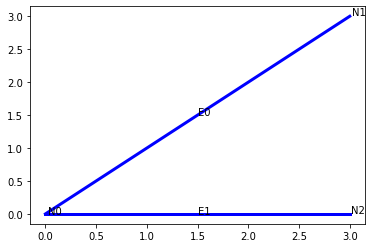

In [4]:
tr1.plot_system()

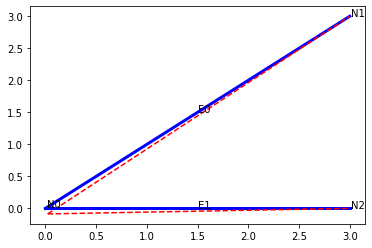

In [5]:
tr1.plot_system(show_displacement=True,magnification=300)

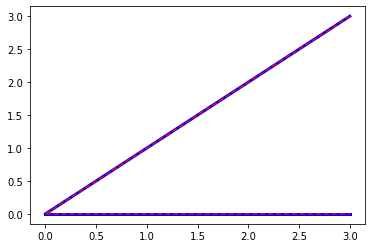

In [6]:
tr1.plot_system(show_element_numbers=False,show_node_numbers=False,show_displacement=True)

In [7]:
tr1.eigen()

{'natural_frequencies_hz': array([329.01235208, 465.2937305 ]),
 'modes': array([[ 9.62127404e-18, -1.13227703e-01],
        [-1.34651191e-01,  1.13227703e-01]]),
 'coor_global': array([0, 3, 3, 0, 3, 0]),
 'index_p': array([2, 3, 4, 5]),
 'index_f': array([0, 1])}

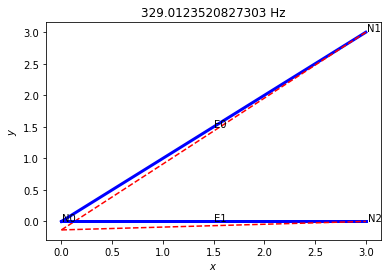

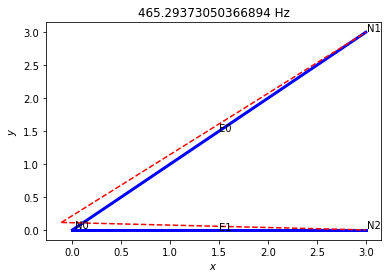

In [8]:
tr1.plot_modes()

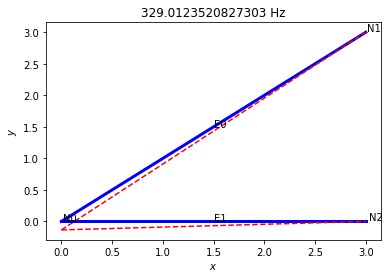

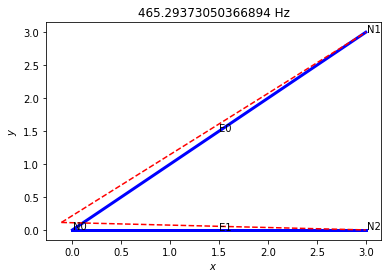

In [9]:
tr1.plot_modes(number_of_modes=4)

In [10]:
tr1.stiffness_global()

array([[ 9.02368927e+08,  2.35702260e+08, -2.35702260e+08,
        -2.35702260e+08, -6.66666667e+08,  0.00000000e+00],
       [ 2.35702260e+08,  2.35702260e+08, -2.35702260e+08,
        -2.35702260e+08,  0.00000000e+00,  0.00000000e+00],
       [-2.35702260e+08, -2.35702260e+08,  2.35702260e+08,
         2.35702260e+08,  0.00000000e+00,  0.00000000e+00],
       [-2.35702260e+08, -2.35702260e+08,  2.35702260e+08,
         2.35702260e+08,  0.00000000e+00,  0.00000000e+00],
       [-6.66666667e+08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.66666667e+08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [11]:
tr1.mass_global()

array([[133.15432893,  55.15432893,  27.57716447,  27.57716447,
         39.        ,   0.        ],
       [ 55.15432893,  55.15432893,  27.57716447,  27.57716447,
          0.        ,   0.        ],
       [ 27.57716447,  27.57716447,  55.15432893,  55.15432893,
          0.        ,   0.        ],
       [ 27.57716447,  27.57716447,  55.15432893,  55.15432893,
          0.        ,   0.        ],
       [ 39.        ,   0.        ,   0.        ,   0.        ,
         78.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [12]:
tr1.elemconn

array([[0, 1],
       [0, 2]])

In [13]:
Mff,Kff = tr1.dynamic_make_matrices()

In [14]:
tr1.mass_global_partition()

(array([[133.15432893,  55.15432893],
        [ 55.15432893,  55.15432893]]),
 array([[27.57716447, 27.57716447, 39.        ,  0.        ],
        [27.57716447, 27.57716447,  0.        ,  0.        ]]),
 array([[55.15432893, 55.15432893,  0.        ,  0.        ],
        [55.15432893, 55.15432893,  0.        ,  0.        ],
        [ 0.        ,  0.        , 78.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]))

In [15]:
tr1.post_stress_strain()

{'strain': array([ 3.53553391e-05, -2.50000000e-05]),
 'stress': array([ 7071067.81186548, -5000000.        ])}

In [16]:
# tr1.post_get_bending_moment(1)

In [17]:
tr1.post_get_displacement(2,1)

0.0

In [18]:
# tr1.post_get_displacement_element(1)

In [19]:
tr1.post_get_force(2,1)

0.0

In [20]:
tr1.post_get_stress(1)

-5000000.0

In [21]:
# tr1.post_plot_bending_moment()

In [22]:
tr1.post_print_element_data([2,2])

                     Element 0                     
Data: 0.000002
                     Element 1                     
Data: 0.000002


In [23]:
tr1.post_print_solution()


                     Node 0                     
u_x: 0.075000 x 10^-3, u_y: -0.287132 x 10^-3, F_x: 0.000000, F_y: -50000.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 50000.000000, F_y: 50000.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -50000.000000, F_y: 0.000000

                     Element 0                     
stress: 7.071068 x 10^6, strain: 0.000035
                     Element 1                     
stress: -5.000000 x 10^6, strain: -0.000025


In [24]:
tr1.solution_dict

{'displacements': array([ 7.50000000e-05, -2.87132034e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 'loads': array([     0., -50000.,  50000.,  50000., -50000.,      0.])}

In [25]:
tr1.stiffness_global()

array([[ 9.02368927e+08,  2.35702260e+08, -2.35702260e+08,
        -2.35702260e+08, -6.66666667e+08,  0.00000000e+00],
       [ 2.35702260e+08,  2.35702260e+08, -2.35702260e+08,
        -2.35702260e+08,  0.00000000e+00,  0.00000000e+00],
       [-2.35702260e+08, -2.35702260e+08,  2.35702260e+08,
         2.35702260e+08,  0.00000000e+00,  0.00000000e+00],
       [-2.35702260e+08, -2.35702260e+08,  2.35702260e+08,
         2.35702260e+08,  0.00000000e+00,  0.00000000e+00],
       [-6.66666667e+08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.66666667e+08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [26]:
tr1.stiffness_global_partition()

(array([[9.02368927e+08, 2.35702260e+08],
        [2.35702260e+08, 2.35702260e+08]]),
 array([[-2.35702260e+08, -2.35702260e+08, -6.66666667e+08,
          0.00000000e+00],
        [-2.35702260e+08, -2.35702260e+08,  0.00000000e+00,
          0.00000000e+00]]),
 array([[2.35702260e+08, 2.35702260e+08, 0.00000000e+00, 0.00000000e+00],
        [2.35702260e+08, 2.35702260e+08, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 6.66666667e+08, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))

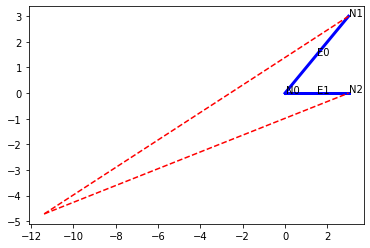

In [27]:
Uf = -np.dot(Kff , np.ones(Kff.shape[0]))/1E8

Ug = tr1.dynamic_make_global_displacement(Uf)

tr1.plot_system(displacement_vector=Ug)

tr1.post_stress_strain(displacement=None),tr1.post_stress_strain(displacement=Ug)

tr1.post_stress_strain(displacement=None),tr1.post_stress_strain(displacement=Ug)

tr1.post_print_solution?

In [28]:
tr1.post_print_solution()

                     Node 0                     
u_x: 0.075000 x 10^-3, u_y: -0.287132 x 10^-3, F_x: 0.000000, F_y: -50000.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 50000.000000, F_y: 50000.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -50000.000000, F_y: 0.000000

                     Element 0                     
stress: 7.071068 x 10^6, strain: 0.000035
                     Element 1                     
stress: -5.000000 x 10^6, strain: -0.000025


In [29]:
tr1.post_print_solution(displacement=tr1.solution_dict["displacements"]*2)

                     Node 0                     
u_x: 0.150000 x 10^-3, u_y: -0.574264 x 10^-3, F_x: 0.000000, F_y: -100000.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 100000.000000, F_y: 100000.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -100000.000000, F_y: 0.000000

                     Element 0                     
stress: 14.142136 x 10^6, strain: 0.000071
                     Element 1                     
stress: -10.000000 x 10^6, strain: -0.000050
